In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#os - operating system dependent. to read/write files
#pd - pandas for data analysis/modeling

data_path = 'data/'

#x_test_data=pd.read_pickle(data_path+'x_test_data.pickle')
#x_train_data=pd.read_pickle(data_path+'x_train_data.pickle')
#y_train_data=pd.read_pickle(data_path+'y_train_data.pickle')

x_validation_data=pd.read_csv(data_path+'validationSetX.csv')
y_validation_data=pd.read_csv(data_path+'validationSetY.csv')
x_train_data=pd.read_csv(data_path+'trainingSetX.csv')
y_train_data=pd.read_csv(data_path+'trainingSetY.csv')

In [2]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

trainedModel = gnb.fit(x_train_data, y_train_data['item_cnt_month'])

In [3]:
y_validation_data_predicted=trainedModel.predict(y_validation_data).astype(int)

In [4]:
y_validation_data_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
np.sqrt(np.mean((y_validation_data_predicted-y_validation_data['item_cnt_month'])**2))

14.547509980088892

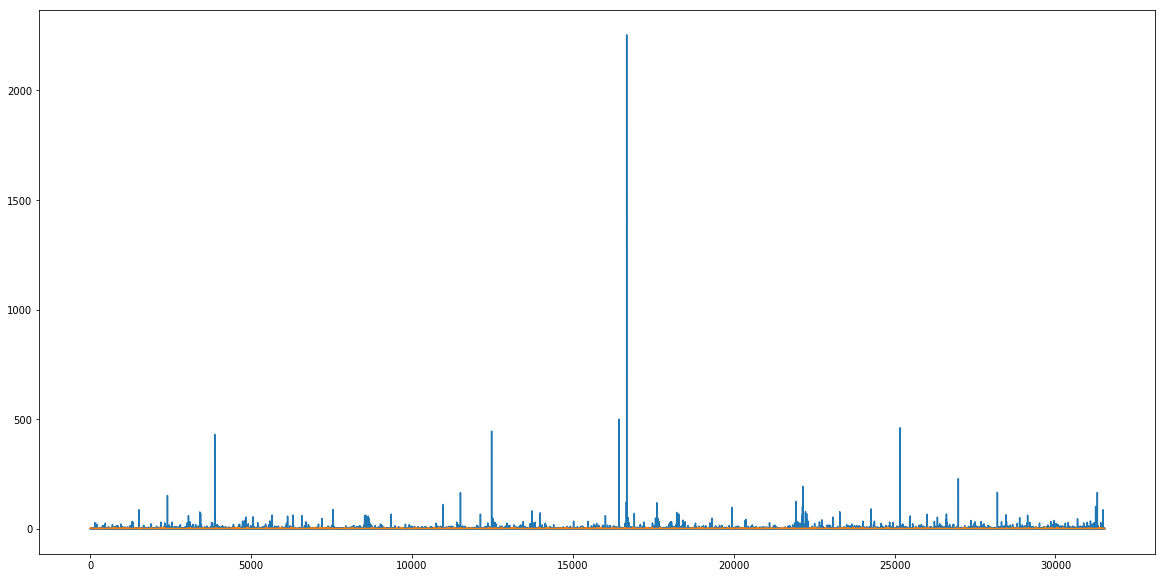

In [25]:
plt.figure(figsize=(20,10))
plt.plot(y_validation_data['item_cnt_month'])
plt.plot(y_validation_data_predicted)
plt.show()

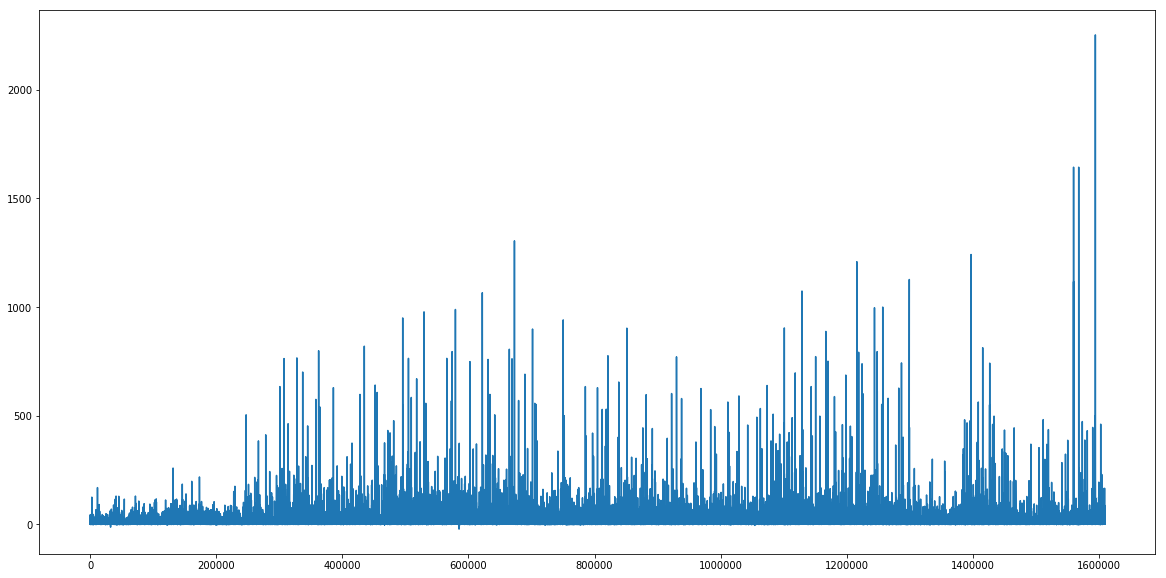

In [17]:
plt.figure(figsize=(20,10))
plt.plot(y_train_data['item_cnt_month'])
plt.show()

In [8]:
#index_col=list(range(0, 214200))
#submission_cols = {'ID': index_col, 'item_cnt_month': y_test_data}
#predicted_data = pd.DataFrame(data=submission_cols)
#predicted_data.head()

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

train_scores, valid_scores = validation_curve(Ridge(), x_train_data, y_train_data, "alpha",np.logspace(0.5, 1, 3))


In [14]:
from sklearn import linear_model
trainedModel = linear_model.LinearRegression()
trainedModel.fit(x_train_data, y_train_data['item_cnt_month'])
trainedModel.score(x_train_data, y_train_data)
#Equation coefficient and Intercept
print('Coefficient: \n', trainedModel.coef_)
print('Intercept: \n', trainedModel.intercept_)
y_validation_data_predicted=trainedModel.predict(x_validation_data).astype(int)

Coefficient: 
 [ 5.64761873e-04  5.88881717e-04 -7.77039479e-06 -5.16857730e-03
  1.18778659e-04]
Intercept: 
 2.4433670665518568


#submission_path = 'submissions/'
#predicted_data.shape
#predicted_data.to_csv(submission_path+'naiveBayes.csv', index=False)

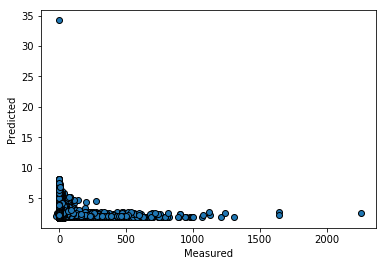

In [36]:
from sklearn.model_selection import cross_val_predict

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, x_train_data, y_train_data['item_cnt_month'], cv=10)

fig, ax = plt.subplots()
ax.scatter(y_train_data['item_cnt_month'], predicted, edgecolors=(0, 0, 0))
#ax.plot([y_train_data['item_cnt_month'].min(), y_train_data['item_cnt_month'].max()], [y_train_data['item_cnt_month'].min(), y_train_data['item_cnt_month'].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()